In [19]:
import sys,os
import matplotlib
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline  
import pandas as pd
from scipy.stats import norm
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)  
tex = lambda x: r'$\mathrm{'+x+'}$'
%config InlineBackend.figure_format = 'retina'
from scipy.stats import kde


:)


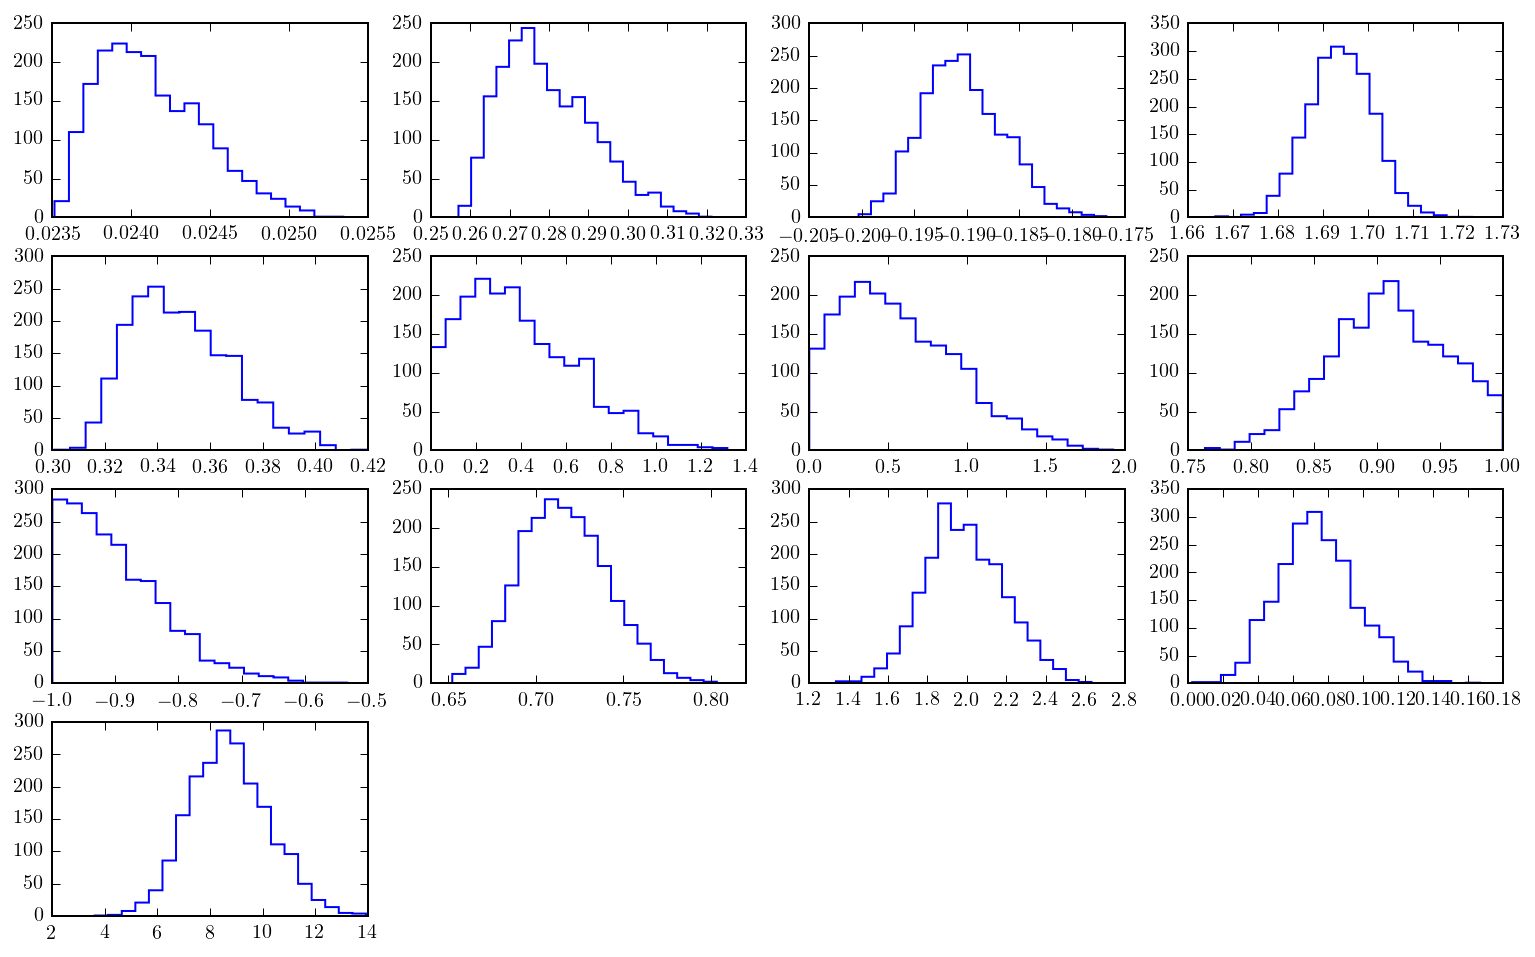

In [2]:
F=open('new_parameters.dat','r')
L=F.readlines()
F.close()
L=np.transpose([[float(x) for x in l.split()] for l in L])
py.figure(figsize=(13,8))
#gs = gridspec.GridSpec(4,4)
#ax=py.subplot(gs[])
for i in range(len(L)):
    ax=py.subplot(4,4,i+1)
    ax.hist(L[i], bins=20, normed=0, histtype='step',color='b')
print ':)'

# now the python way!! (ok first simple example)

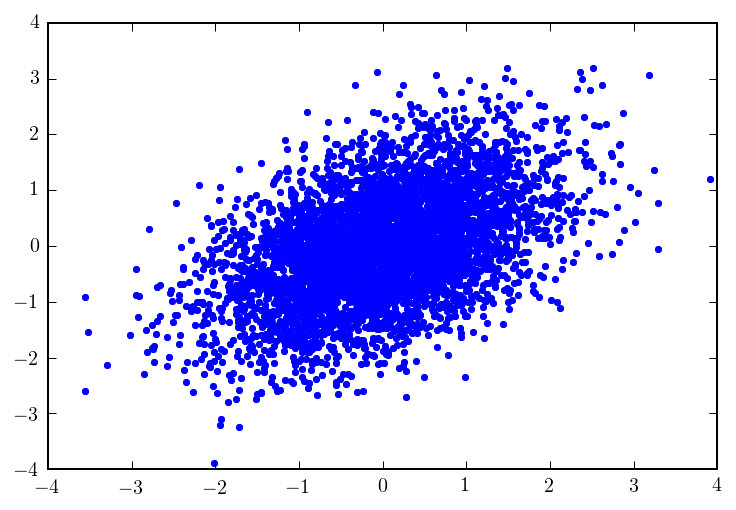

In [5]:
mean = [0,0]
cov = [[1,0.5],[0.5,1]]
x,y = np.random.multivariate_normal(mean,cov,5000).T
ax=py.subplot()
ax.plot(x,y,'.')

# now lets go with the actual covariance

In [20]:
F=open('correlation_matrix.dat')
L=F.readlines()
F.close()
L=[l.strip() for l in L]
L=[l for l in L if l!='']
cov=np.array([[float(x) for x in l.split()] for l in L])
cov

array([[ 1.   ,  0.994,  0.949, -0.38 ,  0.986,  0.979,  0.996,  0.916,
        -0.008,  0.904,  0.869,  0.916,  0.922],
       [ 0.994,  1.   ,  0.953, -0.336,  0.984,  0.975,  0.995,  0.918,
        -0.008,  0.907,  0.871,  0.919,  0.924],
       [ 0.949,  0.953,  1.   , -0.286,  0.916,  0.932,  0.943,  0.888,
        -0.008,  0.874,  0.84 ,  0.888,  0.893],
       [-0.38 , -0.336, -0.286,  1.   , -0.397, -0.327, -0.357, -0.323,
         0.002, -0.322, -0.31 , -0.323, -0.323],
       [ 0.986,  0.984,  0.916, -0.397,  1.   ,  0.963,  0.988,  0.911,
        -0.008,  0.899,  0.863,  0.911,  0.916],
       [ 0.979,  0.975,  0.932, -0.327,  0.963,  1.   ,  0.976,  0.897,
        -0.008,  0.886,  0.851,  0.898,  0.903],
       [ 0.996,  0.995,  0.943, -0.357,  0.988,  0.976,  1.   ,  0.916,
        -0.008,  0.904,  0.869,  0.917,  0.922],
       [ 0.916,  0.918,  0.888, -0.323,  0.911,  0.897,  0.916,  1.   ,
        -0.007,  0.896,  0.842,  0.848,  0.873],
       [-0.008, -0.008, -0.008, 

In [21]:
F=open('correlation_matrix.dat')
L=F.readlines()
F.close()
L=[l.strip() for l in L]
L=[l for l in L if l!='']
cov=np.array([[float(x) for x in l.split()] for l in L])
mean=[
    2.36166e-02,
    2.61971e-01,
    -1.95220e-01,
    1.69586e+00,      
    3.20601e-01,     
    1.46831e-06,     
    3.61390e-03,      
    8.54376e-01,     
    -9.99999e-01,    
    6.88367e-01,     
    1.79434e+00,      
    4.81953e-02,      
    6.99676e+00] 
var=[
    7.17002e-04,
    2.46543e-02,
    7.15875e-03,
    7.59358e-03,      
    4.01160e-02,     
    5.38257e-01,     
    7.93746e-01,      
    8.54376e-01,     
    1.25156e-01,    
    4.33534e-02,     
    3.17379e-01,      
    3.88934e-02,      
    2.64818e+00] 
for i in range(13): 
    for k in range(13): 
        cov[i][k] = cov[i][k]*var[i]*var[k]
        

In [22]:
P0 = np.random.multivariate_normal(mean,cov,50000)

P=[]
for p in P0:
    flag=True
    for k in [0,3,4,5,6,9,10,11,12]:
        if p[k]<0: flag=False        
    for k in [1,2,7,8]:
        if p[k]<-1 or p[k]>1: flag=False
    if flag: P.append(p)
P=np.transpose(P)

In [23]:
P.shape

(13, 2219)

:)


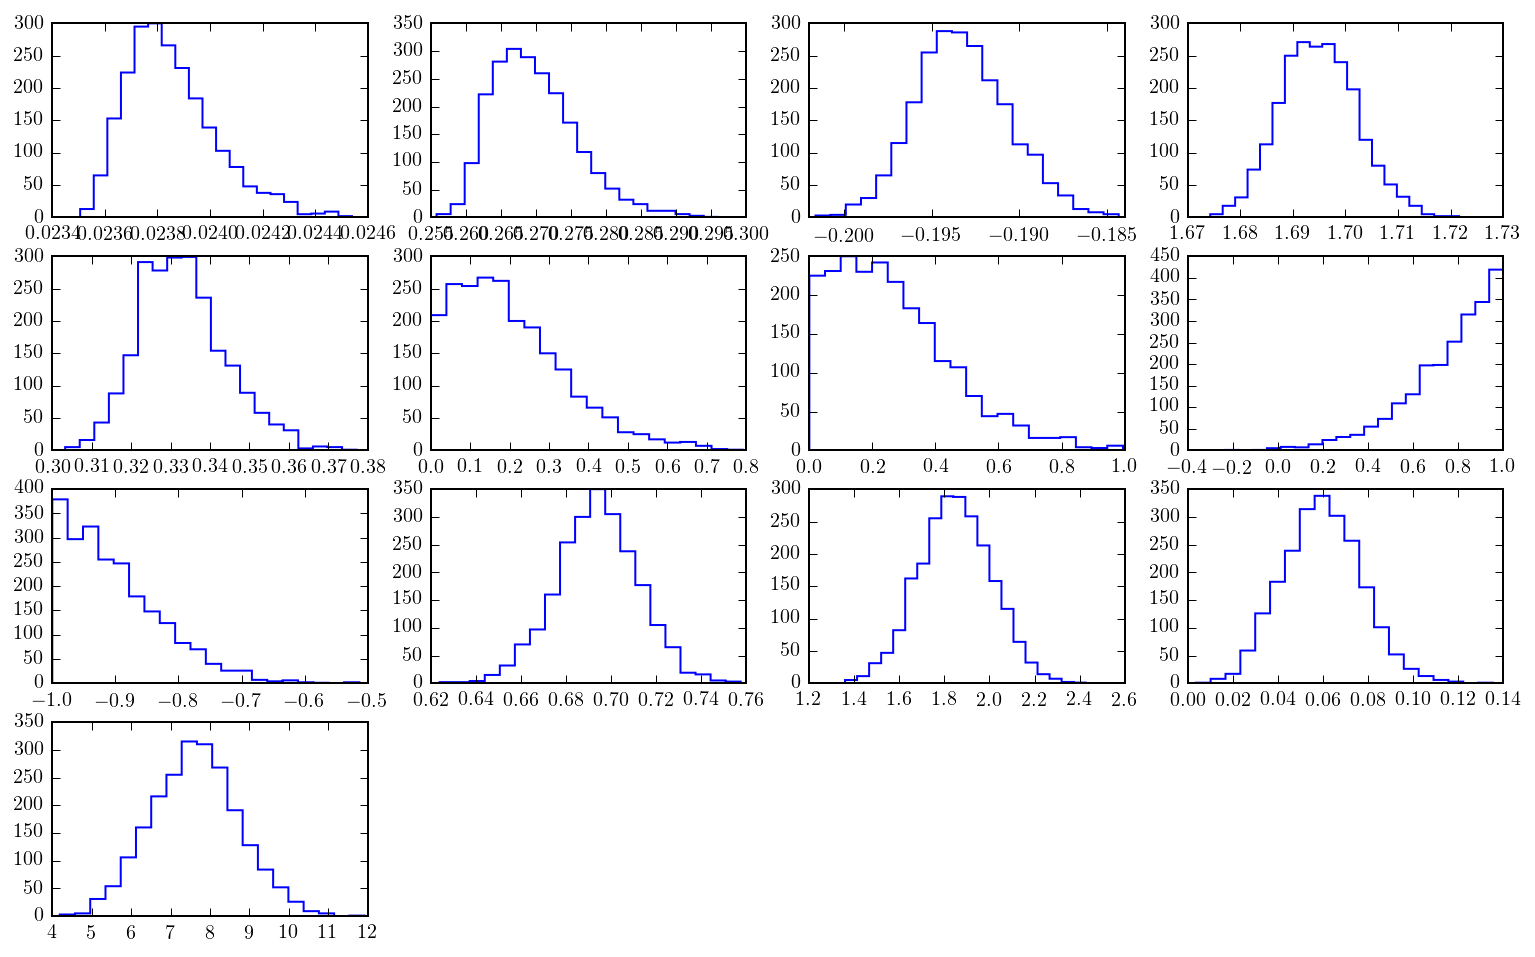

In [24]:
py.figure(figsize=(13,8))
for i in range(len(P)):
    ax=py.subplot(4,4,i+1)
    ax.hist(P[i], bins=20, normed=0, histtype='step',color='b')
print ':)'

In [25]:
for i in range(13):
    print '%0.2e'%(np.abs((np.std(P[i])-var[i]))/var[i])

7.61e-01
7.55e-01
6.26e-01
4.40e-02
7.25e-01
7.39e-01
7.66e-01
7.66e-01
3.90e-01
5.77e-01
4.93e-01
5.53e-01
5.82e-01


In [26]:
P=np.transpose(P)

In [28]:
np.savetxt('params.dat',P, fmt='%f %f %f %f %f %f %f %f %f %f %f %f %f')